# Exercise: Principal component analysis

In this exercise we will employ PCA. 

Author: Stefano Pagani <stefano.pagani@polimi.it>.

Date: 2024

Course: Mathematical and numerical foundations of scientific machine learning

For further details on PCA, see Chapter 1, Brunton, S. L. and Kutz, J. N., Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control (2nd ed.).


In [2]:
# imports

import numpy as np
import scipy.io

import matplotlib.pyplot as plt


In [3]:
# Dataset creation
np.random.seed(42)

# Data matrix size: [200, 800]. Each column corresponds to a time instant t; each row may be the state of a dynamical system
signals = np.zeros((200,800)) 

delta_t = 1.0/800.0 # Time interval between time instants
Nt      = 800 # Number of time instants

t =  np.linspace(0.0, Nt*delta_t, Nt, endpoint=False) # Timegrid of the data

# number of samples (states, one per time instant)
N = 200

# shift coef --> what is it?
shiftcoef = 0.05

# Generate example data
for k in range(N):
    if (np.mod(k,4)==0):
        signals[k,:] = -np.exp( - ((t-0.4-shiftcoef*np.random.rand(1))**2)/(2*(0.001+0.005*np.random.rand(1)))  )
    else:
        signals[k,:] = -np.exp( - ((t-0.4-shiftcoef*np.random.rand(1))**2)/(2*(0.001+0.005*np.random.rand(1)))  ) + np.exp( - ((t-0.4-shiftcoef*np.random.rand(1))**2)/(2*(0.001+0.005*np.random.rand(1)))  )
        



Task 1: plot some signals from the given datasets. What can you observed?

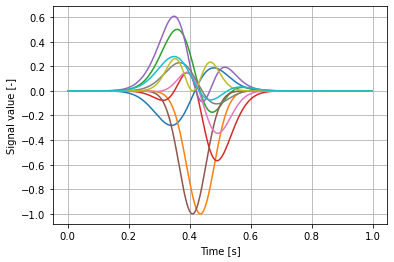

In [4]:
# plt...
NIdX = 10
randomIdXs = np.squeeze(np.random.randint(0, signals[:, 0].size, [1, NIdX]))

# Plot NIdX time series randomly picked from the data matrix "signals"
ax = plt.subplot()
ax.grid(True)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal value [-]')

for idX in randomIdXs:
    ax.plot(t, signals[idX, :])



Task 2: construct a truncated PCA expansion of your dataset based on 10 components. 

See the online documentation of the function.

In [5]:
from sklearn.decomposition import PCA

Ncomp = 10
# Apply PCA to data matrix and obtain a reduced-order approximation with Ncomp components
signalsPCA = PCA(Ncomp) # Instantiate PCA object
signalsPCA.fit(signals) # Fit PCA object to data matrix



PCA(n_components=10)


Task 3: extract the mean and the first three basis functions and plot them. 

What can you observe?

In [6]:
Nred = 3 # Number of components in the reduced order model

# Compute mean of data matrix
signals_mean = np.mean(signals, 0) # Mean along signals ensemble axis (0)
#print('Signals mean', signals_mean)
Bmatrix = signals - signals_mean # Centred data matrix (mean removed)


# Compute the same mean using PCA object attribute
signalsPCA_mean = signalsPCA.mean_ # Note that mean_ is the attribute containing the mean along axis=0 (not settable)

# Get first Nred basis functions (components) from the data set
FcnsBasis = signalsPCA.components_[0:Nred, :]



Task 4: plot the cumulative sum of the explained variance ratio (how much variability is capture by the first n components)

Explained variance ratio of first 10 components: [6.99208291e-01 1.77351202e-01 1.07499257e-01 1.19741041e-02
 3.09840061e-03 6.87800534e-04 1.37146915e-04 3.50283341e-05
 6.75476979e-06 1.54657860e-06]
First 10 singular values: [57.53582492 28.97691372 22.55993228  7.5293342   3.83004471  1.80453917
  0.80580152  0.40723472  0.17882998  0.08556991]
Cumulative variance ratio of first 3 components: 0.9840587504267762


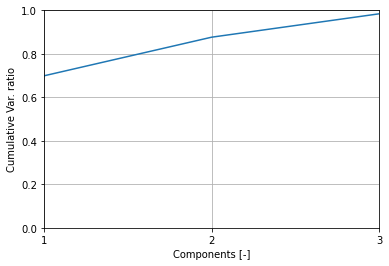

In [15]:
# Print relevant information
print('Explained variance ratio of first',Ncomp,'components:', signalsPCA.explained_variance_ratio_)
print('First',Ncomp,'singular values:', signalsPCA.singular_values_)

sumNredVarRatio = np.sum(signalsPCA.explained_variance_ratio_[0:Nred])
print('Cumulative variance ratio of first',Nred,'components:',sumNredVarRatio)

# Compute cumulative variance ratio
cumVarRatioPlot = plt.subplot()
cumVarRatio = np.zeros([Nred+1,])
for idC in np.flip(np.arange(Nred+1)):
    cumVarRatio[idC] = np.sum(signalsPCA.explained_variance_ratio_[0:idC])

# Plot cumulative variance ratio
cumVarRatioPlot.grid(True)
cumVarRatioPlot.set_xlabel('Components [-]')
cumVarRatioPlot.set_ylabel('Cumulative Var. ratio')
cumVarRatioPlot.set_ylim(0, 1)
cumVarRatioPlot.set_xlim(1, Nred)
cumVarRatioPlot.set_xticks(np.arange(1, Nred+1, step=1))
cumVarRatioPlot.plot(range(Nred+1), cumVarRatio)




Task 5: compute the coefficients of the expansion associated with the first three basis functions. 

In [8]:
# The coefficients of the expansion are obtained as projection of the data matrix onto each basis function obtained from PCA
# using the inner product:
#coefficient_0 = ...  



Task 6: Represent a scatter plot of the components. Are the coefficients clearly separated?

In [9]:

# 
#col_vec = np.int32( np.mod(np.arange(0,200,1),4) ==0 )
#plt.scatter(...,c=col_vec)



Task 7: compare the plot of the actual signals with the reconstructed ones.

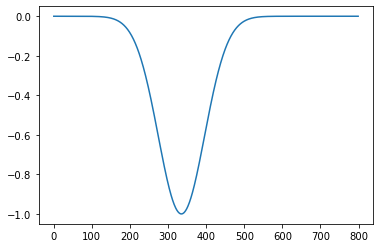

In [10]:
ind_sel = 0
plt.plot(signals[ind_sel,:])
# ...


Task 8: study the effect of the variable shiftcoef on the reconstruction. What can you observe?

Task 9: study the effect noise on the reconstruction. What can you observe?